In [ ]:
import sys
from pathlib import Path

# This resolves to .../stock_market_project/notebooks
notebook_dir = Path().resolve()

# Repo root is one level up: .../stock_market_project
project_root = notebook_dir.parent

# Add repo root to sys.path so "import src..." works
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print("Notebook dir:", notebook_dir)
print("Project root:", project_root)
print("sys.path[0]:", sys.path[0])


Notebook dir: C:\Users\ben10\stock_market_project\notebooks
Project root: C:\Users\ben10\stock_market_project
sys.path[0]: C:\Users\ben10\stock_market_project


In [ ]:
from src.price_series import PriceSeries

tickers = ["AAPL", "MSFT", "TSLA"]
series = {}

for t in tickers:
    ps = PriceSeries.from_csv(t, f"../data/{t}.csv")
    ps.df = ps.df.loc["2015-01-01":]
    series[t] = ps
    print(ps)


PriceSeries(symbol=AAPL, rows=2754, range=2015-01-02..2025-12-12)
PriceSeries(symbol=MSFT, rows=2754, range=2015-01-02..2025-12-12)
PriceSeries(symbol=TSLA, rows=2754, range=2015-01-02..2025-12-12)


In [ ]:
for t, ps in series.items():
    print(t)
    print("  last close:", ps.close_prices().iloc[-1])
    print("  max drawdown:", ps.max_drawdown())
    print("  vol(20):", ps.volatility(20))


AAPL
  last close: 278.28
  max drawdown: -0.38517722216582306
  vol(20): 0.009608389871570266
MSFT
  last close: 478.53
  max drawdown: -0.3714824793007867
  vol(20): 0.014752081429803925
TSLA
  last close: 458.96
  max drawdown: -0.7363221699148719
  vol(20): 0.02240978435740141


# Graphing 

Used to make all graphs the same scale improving data comparison

In [ ]:
# Compute global min/max across all tickers
global_min = min(ps.close_prices().min() for ps in series.values())
global_max = max(ps.close_prices().max() for ps in series.values())

# Add small padding so lines don't touch the edges
padding = 0.05 * (global_max - global_min)
ymin = global_min - padding
ymax = global_max + padding


Creates the 3 individual graphs for data visulization

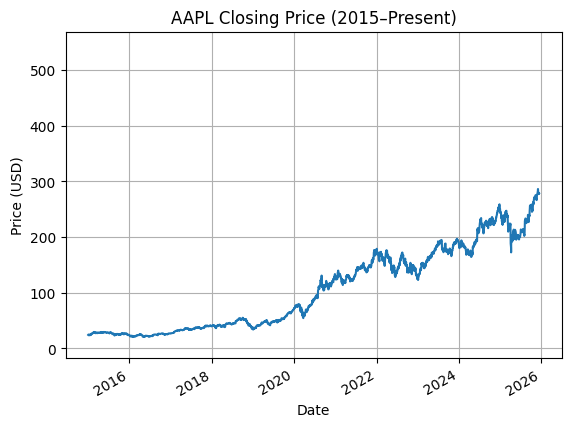

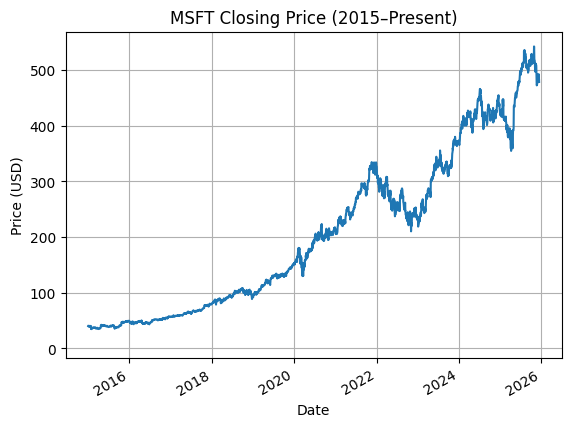

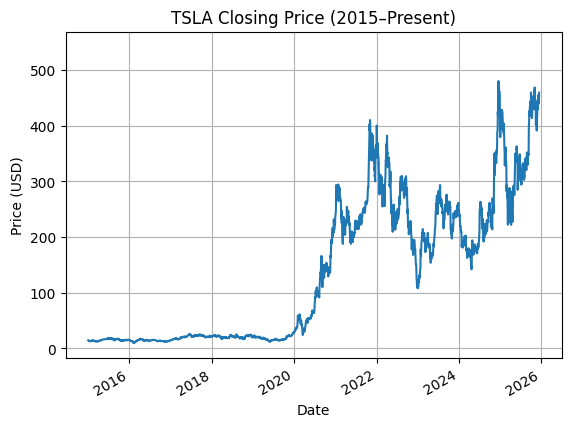

In [ ]:
import matplotlib.pyplot as plt

for ticker, ps in series.items():
    ps.close_prices().plot()
    plt.title(f"{ticker} Closing Price (2015–Present)")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.ylim(ymin, ymax)          
    plt.grid(True)
    plt.show()


**Additional Plot of all graphs overlayed with one another**

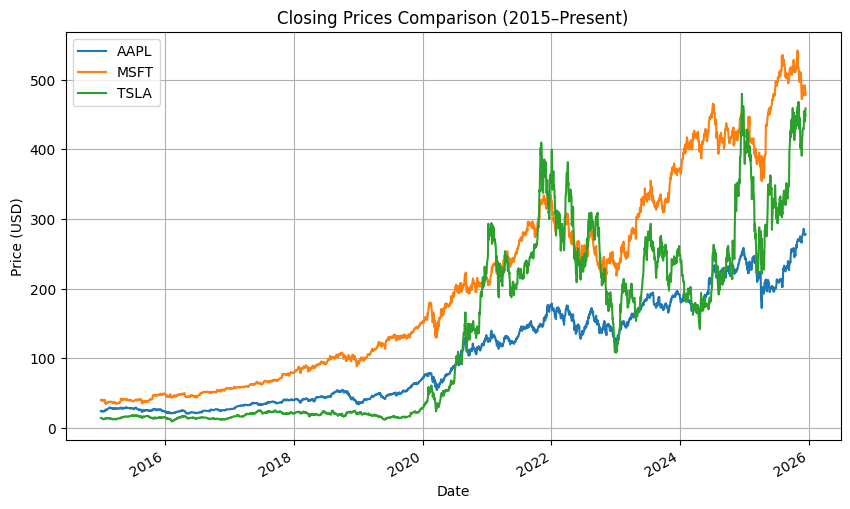

In [ ]:
plt.figure(figsize=(10, 6))

for ticker, ps in series.items():
    ps.close_prices().plot(label=ticker)

plt.title("Closing Prices Comparison (2015–Present)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.ylim(ymin, ymax)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from src.price_series import PriceSeries
from src.portfolio_analyzer import PortfolioAnalyzer

tickers = ["AAPL", "MSFT", "TSLA"]
series_list = [PriceSeries.from_csv(t, f"../data/{t}.csv") for t in tickers]

pa = PortfolioAnalyzer(series_list, start_date="2015-01-01")
print(pa)
pa.summary()

: 

In [ ]:
import matplotlib.pyplot as plt

corr = pa.correlation_matrix()
print(corr)

plt.imshow(corr.values)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Return Correlation (2015–Present)")
plt.colorbar()
plt.show()

: 

In [ ]:
port = pa.equal_weight_portfolio_returns()
port.plot(title="Equal Weight Portfolio Daily Returns (2015–Present)")
plt.xlabel("Date")
plt.ylabel("Return (decimal)")
plt.grid(True)
Plt.show()


In [ ]:
cum = (1 + pa.equal_weight_portfolio_returns()).cumprod() - 1
cum.plot(title="Equal Weight Portfolio Cumulative Returns (2015–Present)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()